In [1]:
import numpy as np
from cellpose import models, io
import logging
impath = r"D:\images\tnia-python-images\imagesc\2024_09_01_segmentation_napari_list\screenshot.tif"
logging.basicConfig(level=logging.INFO)
im = io.imread(impath)

mod = models.Cellpose(gpu=True, model_type="cyto3")

diameters = [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210]
masks = []
num_masks = []

for d in diameters:
    print(f"Running diameter {d}")
    mask = mod.eval(im, diameter=d, channels=[0,0])[0]
    masks.append(mask)
    num_masks.append(len(np.unique(mask)-1))
    print(f"Number of masks: {num_masks[-1]}")


INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU
INFO:cellpose.models:>> cyto3 << model set to be used
INFO:cellpose.models:>>>> loading model C:\Users\bnort\.cellpose\models\cyto3
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:channels set to [0, 0]
INFO:cellpose.models:~~~ FINDING MASKS ~~~


Running diameter 10


INFO:cellpose.models:>>>> TOTAL TIME 2.31 sec
INFO:cellpose.models:channels set to [0, 0]
INFO:cellpose.models:~~~ FINDING MASKS ~~~


Number of masks: 20
Running diameter 30


INFO:cellpose.models:>>>> TOTAL TIME 0.22 sec
INFO:cellpose.models:channels set to [0, 0]
INFO:cellpose.models:~~~ FINDING MASKS ~~~


Number of masks: 82
Running diameter 50


INFO:cellpose.models:>>>> TOTAL TIME 0.28 sec
INFO:cellpose.models:channels set to [0, 0]
INFO:cellpose.models:~~~ FINDING MASKS ~~~


Number of masks: 70
Running diameter 70


INFO:cellpose.models:>>>> TOTAL TIME 0.29 sec
INFO:cellpose.models:channels set to [0, 0]
INFO:cellpose.models:~~~ FINDING MASKS ~~~


Number of masks: 57
Running diameter 90


INFO:cellpose.models:>>>> TOTAL TIME 0.29 sec
INFO:cellpose.models:channels set to [0, 0]
INFO:cellpose.models:~~~ FINDING MASKS ~~~


Number of masks: 41
Running diameter 110


INFO:cellpose.models:>>>> TOTAL TIME 0.33 sec
INFO:cellpose.models:channels set to [0, 0]
INFO:cellpose.models:~~~ FINDING MASKS ~~~


Number of masks: 18
Running diameter 130


INFO:cellpose.models:>>>> TOTAL TIME 0.35 sec
INFO:cellpose.models:channels set to [0, 0]
INFO:cellpose.models:~~~ FINDING MASKS ~~~


Number of masks: 10
Running diameter 150


INFO:cellpose.models:>>>> TOTAL TIME 0.43 sec
INFO:cellpose.models:channels set to [0, 0]
INFO:cellpose.models:~~~ FINDING MASKS ~~~


Number of masks: 5
Running diameter 170


INFO:cellpose.models:>>>> TOTAL TIME 0.44 sec
INFO:cellpose.models:channels set to [0, 0]
INFO:cellpose.models:~~~ FINDING MASKS ~~~


Number of masks: 4
Running diameter 190


INFO:cellpose.models:>>>> TOTAL TIME 0.36 sec
INFO:cellpose.models:channels set to [0, 0]
INFO:cellpose.models:~~~ FINDING MASKS ~~~


Number of masks: 1
Running diameter 210


INFO:cellpose.models:>>>> TOTAL TIME 0.51 sec


Number of masks: 2


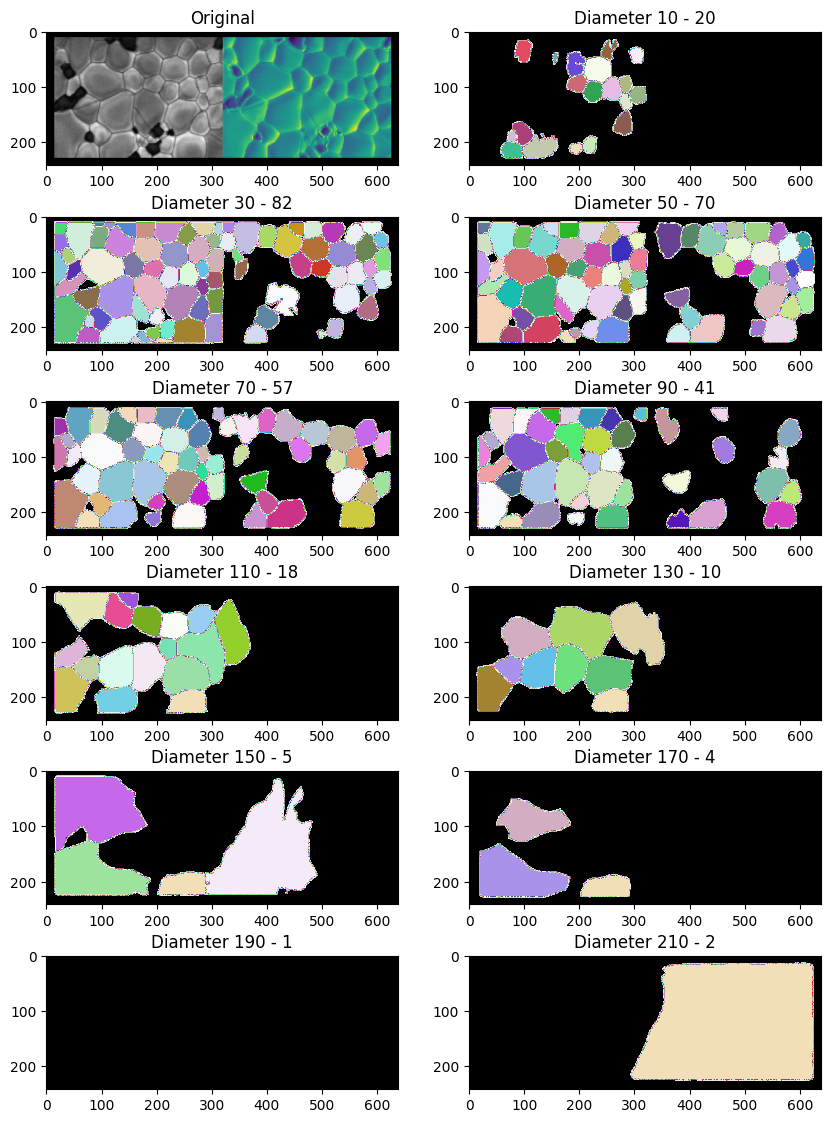

In [3]:
from tnia.plotting.plt_helper import imshow_multi2d
from tnia.plotting.plt_helper import random_label_cmap

colormaps = ["gray"]+[random_label_cmap()]*len(masks)
#colormaps = ["gray"]+["viridis"]*len(masks)

titles = ["Original"] + [f"Diameter {d} - {n}" for d,n in zip(diameters, num_masks)]    

# append the original image to the beginning of the masks
masks_ = [im] + masks

fig = imshow_multi2d(masks_, titles, 6, 2,colormaps=colormaps, width=10, height=14)

In [ ]:
import numpy as np
from cellpose import models, io
import logging
import napari
impath = r"D:\images\tnia-python-images\imagesc\2024_09_01_segmentation_napari_list\screenshot.tif"
logging.basicConfig(level=logging.INFO)
im = io.imread(impath)

viewer = napari.Viewer()
viewer.add_image(im)

mod = models.Cellpose(gpu=True, model_type="cyto3")

diameters = [10, 30, 50, 70, 90]
masks = []
num_masks = []

for d in diameters:
    print(f"Running diameter {d}")
    mask = mod.eval(im, diameter=d, channels=[0,0])[0]
    masks.append(mask)
    num_masks.append(len(np.unique(mask)-1))
    print(f"Number of masks: {num_masks[-1]}")
    viewer.add_labels(masks[-1], name="masks diameter="+str(d))
napari.run()

In [12]:
import napari
viewer = napari.Viewer()
viewer.add_image(im)
viewer.add_labels(masks_cpu, name="masks_cpu")
viewer.add_labels(masks_gpu, name="masks_gpu")
napari.run()

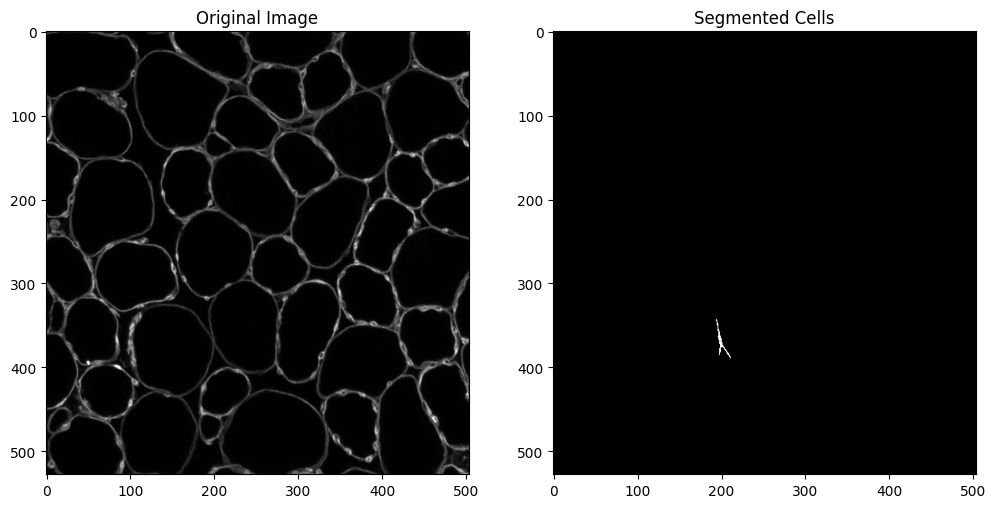

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, morphology
from skimage.segmentation import clear_border

impath = r"D:\images\tnia-python-images\imagesc\2024_09_01_cellpose_repeat\border_smallCompositeCalibrated.tif"

# Step 1: Load the image
image = io.imread(impath)

# Step 2: Convert to grayscale (if not already grayscale)
gray_image = image#color.rgb2gray(image)

# Step 3: Apply Gaussian blur to reduce noise
blurred_image = filters.gaussian(gray_image, sigma=1.0)

# Step 4: Apply Otsu's thresholding
threshold_value = filters.threshold_otsu(blurred_image)
binary_mask = blurred_image > threshold_value

# Step 5: Remove small objects and clear the border
cleaned_mask = morphology.remove_small_objects(binary_mask, min_size=30)
cleaned_mask = clear_border(cleaned_mask)

# Step 6: Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Segmented Cells')
plt.imshow(cleaned_mask, cmap='gray')

plt.show()

INFO:cellpose.models:channels set to [0, 0]
INFO:cellpose.models:~~~ FINDING MASKS ~~~
INFO:cellpose.models:>>>> TOTAL TIME 0.56 sec


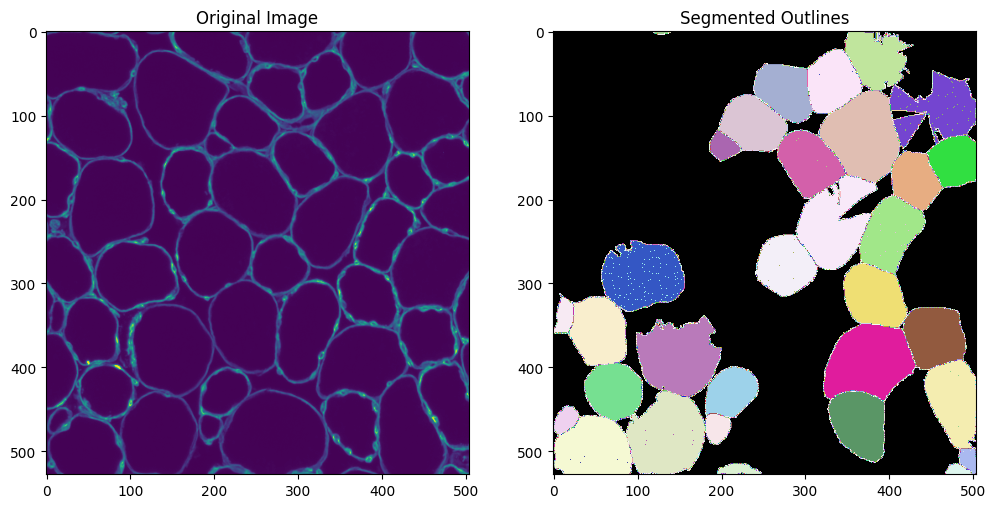

In [27]:

# Run the model
import random


masks, flows, styles, diams = mod.eval(image, channels=[0,0])


# Display the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)

# Display the segmented outlines
plt.subplot(1, 2, 2)
plt.title('Segmented Outlines')
plt.imshow(masks, cmap=random_label_cmap())


In [24]:
import cellpose
import numpy as np

# Load the image
img = np.load(impath)

# Create a Cellpose model
model = cellpose.models.CellposeModel(style="brightfield")

# Segment the image
masks, flows = model.eval(img, diameter=None, channels=None)

# Display the results (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(masks[0])

plt.title('Segmented Cells')

plt.show()

ValueError: Cannot load file containing pickled data when allow_pickle=False